In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
spec_types = 'Generated_Crackle_Coarse','Generated_Normal','Generated_Crackle_Fine','Generated_Wheezes','Real_Covid','Real_Non_Covid'

path = Path('Spectrograms')

In [4]:
fns = get_image_files(path)
fns

(#6684) [Path('Spectrograms/Generated_Wheezes/Wheezes_0175.jpg'),Path('Spectrograms/Generated_Wheezes/Wheezes_0262.jpg'),Path('Spectrograms/Generated_Wheezes/Wheezes_0249.jpg'),Path('Spectrograms/Generated_Wheezes/Wheezes_0095.jpg'),Path('Spectrograms/Generated_Wheezes/Wheezes_0064.jpg'),Path('Spectrograms/Generated_Wheezes/Wheezes_0034.jpg'),Path('Spectrograms/Generated_Wheezes/Wheezes_0185.jpg'),Path('Spectrograms/Generated_Wheezes/Wheezes_0229.jpg'),Path('Spectrograms/Generated_Wheezes/Wheezes_0228.jpg'),Path('Spectrograms/Generated_Wheezes/Wheezes_0033.jpg')...]

In [5]:
specs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [6]:
dls = specs.dataloaders(path)

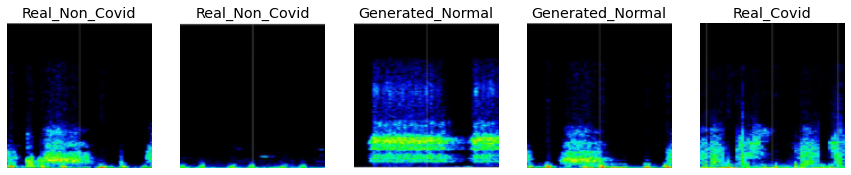

In [7]:
dls.valid.show_batch(max_n=5, nrows=1)

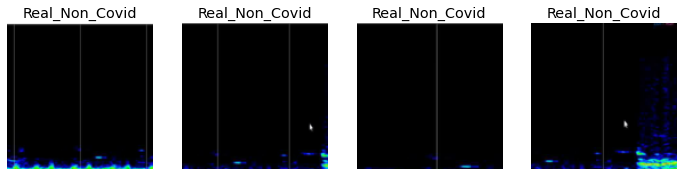

In [8]:
specs = specs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = specs.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

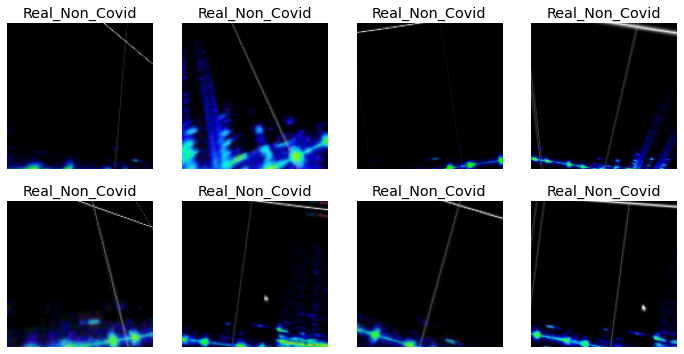

In [9]:
specs = specs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = specs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

In [10]:
specs = specs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = specs.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.169887,0.794278,0.251497,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.458279,0.353135,0.156437,00:13
1,0.325586,0.261643,0.131737,00:14
2,0.271868,0.252154,0.140719,00:13


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
arr = interp.confusion_matrix()

In [ ]:
import seaborn as sns

df_cm = pd.DataFrame(arr, spec_types, spec_types)

plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True,fmt='g',cmap="Blues") 
plt.show()

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

## Turning Your Model into an Online Application

### Using the Model for Inference

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export_spec.pkl')

In [ ]:
learn_inf.predict('../images/crackle_fine_0003.jpg')

In [ ]:
learn_inf.dls.vocab